In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
diabetes_data = pd.read_csv('diabetes.csv')

In [5]:
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
diabetes_data.shape


(768, 9)

In [9]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
diabetes_data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [12]:
diabetes_data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [20]:
X = diabetes_data.drop(columns = 'Outcome', axis = 1)

In [23]:
Y = diabetes_data['Outcome']

In [24]:
scaler = StandardScaler()

In [25]:
scaler.fit(X)

StandardScaler()

In [28]:
standardized_data = scaler.transform(X)

In [33]:
X = standardized_data

In [127]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 4)


stratify is to split the Y values proportionally between testing and training and not to give all 0 to train and all 1 to test

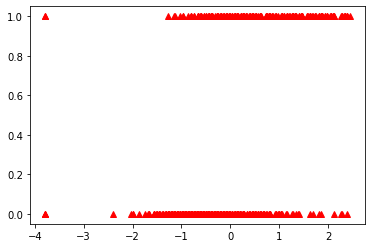

In [128]:
plt.plot(X_train[:, 1], Y_train, 'r^')

In [129]:
X_train.shape

(614, 8)

In [130]:
X_test.shape

(154, 8)

In [131]:
classifier = svm.SVC(kernel = 'linear') #svc is support vector classifier

In [132]:
classifier.fit(X_train, Y_train) #training the model

SVC(kernel='linear')

In [133]:
X_train_prediction = classifier.predict(X_train) #predicting values of the training data after modelling
training_accuracy_score = accuracy_score(X_train_prediction, Y_train) # finding accuracy score of predicted and actual values
print("Accuracy score of the training data itself is: ", training_accuracy_score)

Accuracy score of the training data itself is:  0.7866449511400652


In [134]:
X_test_prediction = classifier.predict(X_test) #predicting values of testing data
testing_accuracy_score = accuracy_score(X_test_prediction, Y_test) # finding accuracy score of predicted and actual test data

In [135]:
print("Accuracy score of testing data is: ", testing_accuracy_score)

Accuracy score of testing data is:  0.7272727272727273


In [136]:
input_data = (10, 168, 74, 0, 0, 38, 0.537, 34)
input_data_as_nparr = np.asarray(input_data)

#reshape is important as we are giving 1 data point but model is expecting 768 data points so to let it know
reshaped_input_data = input_data_as_nparr.reshape(1, -1)

In [137]:
#standardizing the input data
standardized_input_data = scaler.transform(reshaped_input_data)

print(standardized_input_data)

#predicting for the input data
#expected should be 1
input_data_prediction = classifier.predict(standardized_input_data)

print(input_data_prediction)

[[ 1.82781311  1.4742667   0.25303625 -1.28821221 -0.69289057  0.76245745
   0.1966813   0.06459135]]
[1]


c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [138]:
if(input_data_prediction[0] == 0):
    print("The person is not diabetic")
else:
    print("The person is diabetic")

The person is diabetic
